In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [229]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [230]:
df.shape  # Get data dimension

(8124, 23)

In [231]:
df.describe() # statistical Summary

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [232]:
df.isnull().sum() #  Finding the null value in the dataset

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

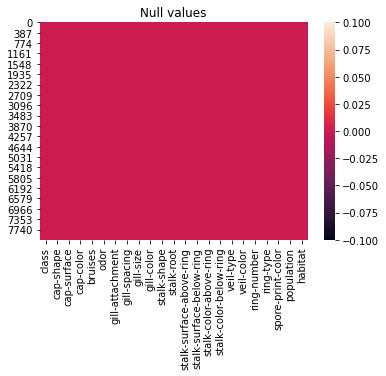

In [233]:
sns.heatmap(df.isnull())  #Heatmap to check the null values
plt.title('Null values')
plt.show()

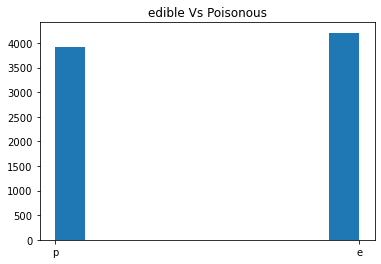

In [234]:
df['class'].hist(grid=False)
plt.title('edible Vs Poisonous')
plt.show()

In [235]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

There is no sign of imbalance

In [236]:
# ladel encoding is needed to convert dataset into 0 and 1 so that we can check the correlation of target variable with other column
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['class']=LE.fit_transform(df['class'])
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [237]:
df=(df.apply(LabelEncoder().fit_transform))
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [238]:
df.corr()  # correlation matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [239]:
df=df.drop(['veil-type'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

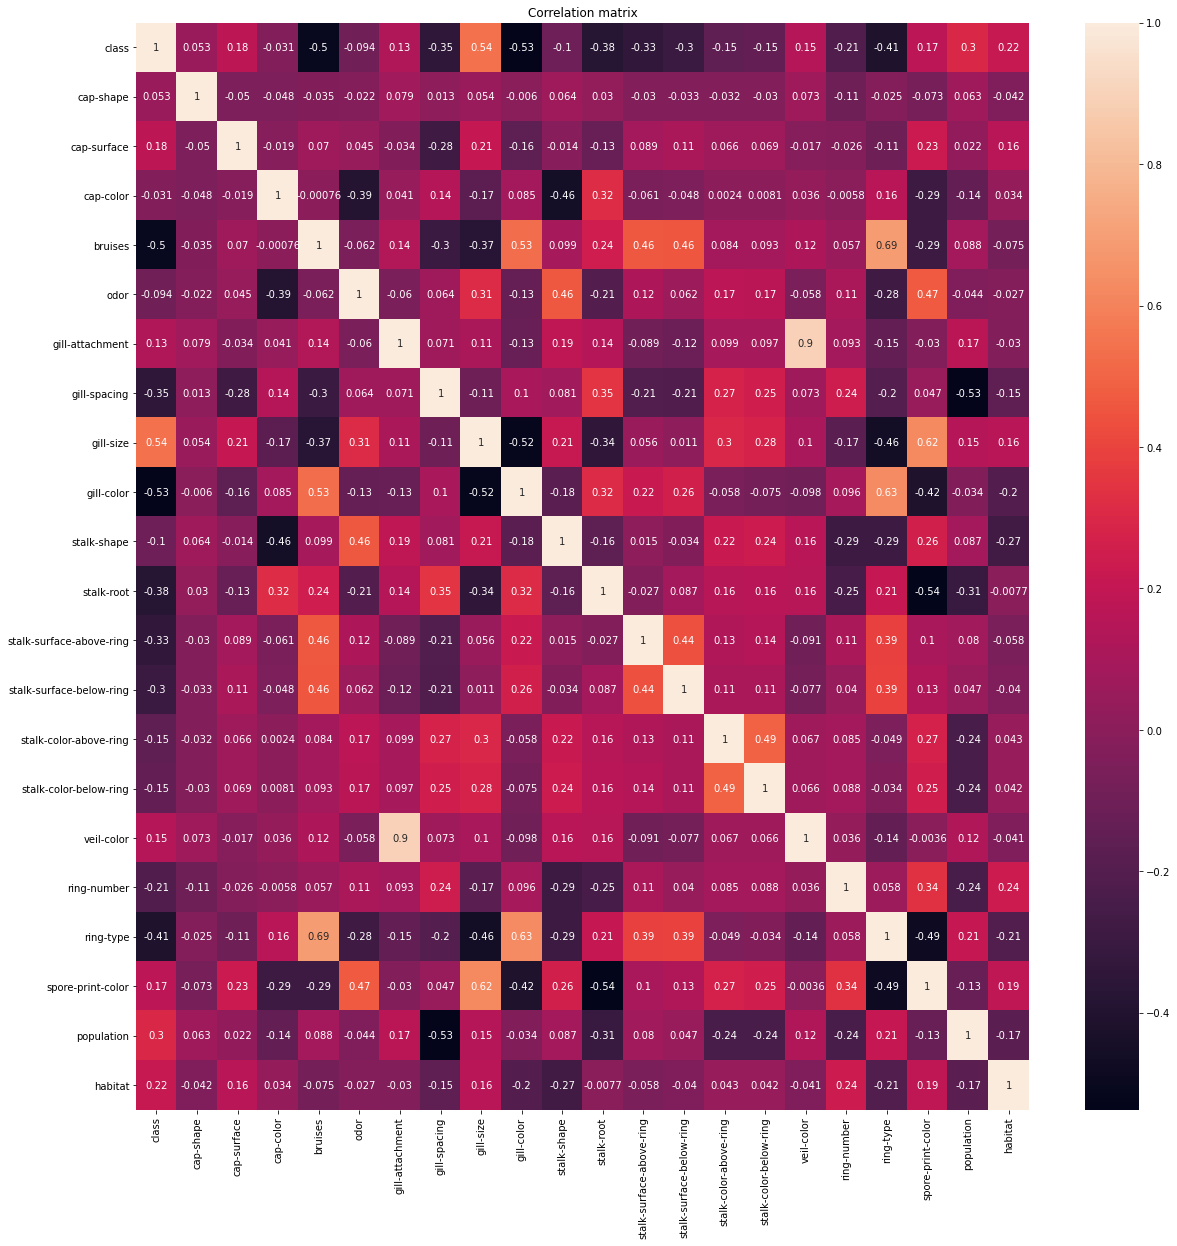

In [240]:
corr_mat=df.corr()
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True) # plotting the correlation matrix
plt.title('Correlation matrix')
plt.show

In [241]:
corr_matrix=df.corr()
corr_matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [242]:
corr_matrix=df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

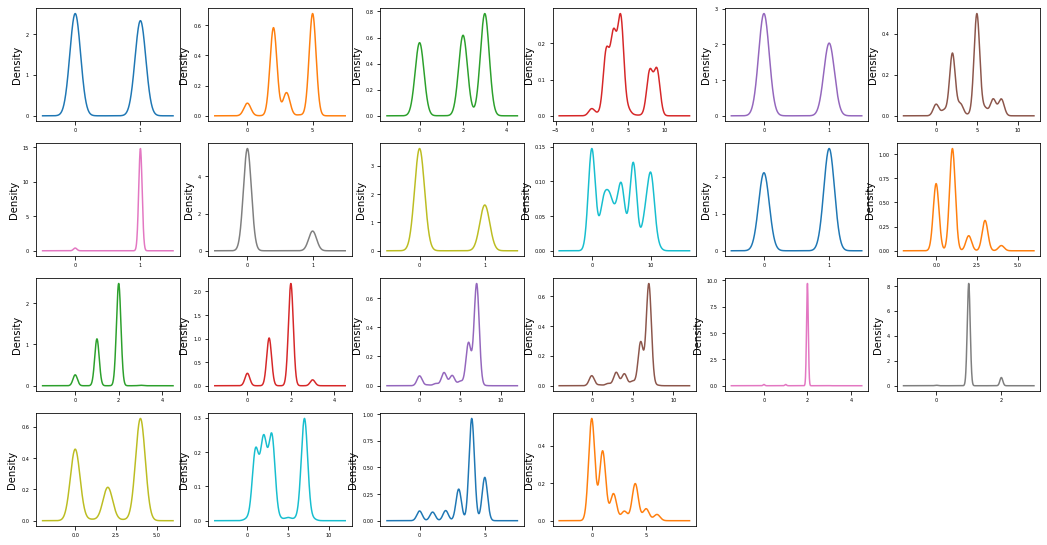

In [243]:
#checking the data distribution with all the columns
df.plot(kind='density', subplots=True, sharex=False, layout=(5,6), legend=False, fontsize=5, figsize=(18,12))
plt.show

In [244]:
# splitting the tartget and independent varibales in x and y  
x=df.drop('class',axis=1)
y=df['class']

In [245]:
# remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
type(x_new)
x=pd.DataFrame(x_new,columns=x.columns)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.035775,0.050170,-0.026740,1.185917,0.881477,0.162896,-0.438864,1.494683,-0.080699,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
1,1.035775,0.050170,1.563194,1.185917,-2.030416,0.162896,-0.438864,-0.669038,-0.080699,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,0.019064,-1.474856,0.116348
2,-2.027882,0.050170,1.305930,1.185917,-0.528118,0.162896,-0.438864,-0.669038,0.186585,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,0.019064,-1.474856,1.066339
3,1.035775,0.998646,1.305930,1.185917,0.881477,0.162896,-0.438864,1.494683,0.186585,-1.144806,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
4,1.035775,0.050170,-0.490015,-0.843230,0.417908,0.162896,2.278612,-0.669038,-0.080699,0.873511,...,0.708807,0.553899,0.765581,0.769774,0.098221,-0.200377,-1.291192,0.019064,-2.108626,0.116348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.234089,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,1.522575,-1.144806,...,0.708807,0.553899,-0.939926,-0.902249,-4.634069,-0.200377,0.933807,-2.806195,-1.898575,0.702479
8120,1.035775,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,1.522575,-1.144806,...,0.708807,0.553899,-0.939926,-0.902249,-5.190986,-0.200377,0.933807,-2.806195,0.154124,0.702479
8121,-0.851275,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,0.186585,-1.144806,...,0.708807,0.553899,-0.939926,-0.902249,-4.634069,-0.200377,0.933807,-2.806195,-1.898575,0.702479
8122,-0.234089,0.998646,-0.026740,-0.843230,1.794391,0.162896,-0.438864,1.494683,-1.502261,0.873511,...,0.708807,-0.994621,0.765581,0.769774,0.098221,-0.200377,-1.291192,1.298625,0.154124,0.702479


In [246]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

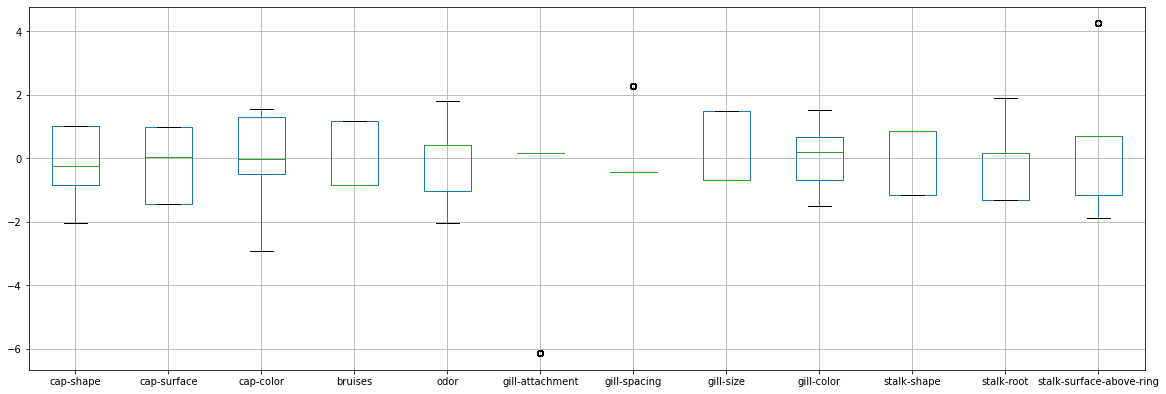

In [247]:
x.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

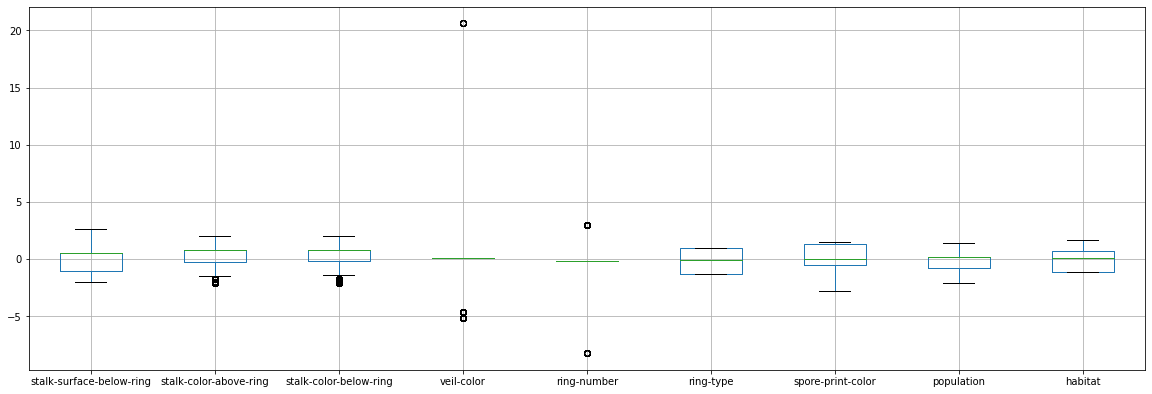

In [248]:
x.iloc[:,12:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [249]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

### Training process begins

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [251]:
maxAcc=0  #maximum acciuracy
maxRS=0   # best random state value for which maximun accuracy is achieved
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)    # fitting the data will train our model
    predrf=LR.predict(x_test)  # predicted target varibale
    acc=accuracy_score(y_test,predrf)  # accuracy score
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc, 'on Random_state', maxRS)

Best accuracy is 0.9636923076923077 on Random_state 164


In [252]:
predlr=LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 95.01538461538462
[[784  36]
 [ 45 760]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       820
           1       0.95      0.94      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [253]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 100.0
[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [254]:
#  Random forest classifer
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


Accuracy 100.0
[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [255]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))


Accuracy 100.0
[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# ## Cross validation

In [256]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print('cross valiidation score for LR :',scr.mean())

cross valiidation score for LR : 0.8181541492989769


In [257]:
scr1=cross_val_score(dt,x,y,cv=5)
print('cross valiidation score for DTC :',scr1.mean())

cross valiidation score for DTC : 0.9670099280030314


In [258]:
scr2=cross_val_score(rf,x,y,cv=5)
print('cross valiidation score for RF :',scr2.mean())

cross valiidation score for RF : 0.8932460022735885


In [259]:
scr3=cross_val_score(svc,x,y,cv=5)
print('cross valiidation score for SVC :',scr3.mean())

cross valiidation score for SVC : 0.8638184918529745


In [260]:
from sklearn.model_selection import GridSearchCV

# creating parametres list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)  # Fittind the data in model
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [261]:
GCV_pred=GCV.best_estimator_.predict(x_test)  # predicting with best parmeters
accuracy_score(y_test,GCV_pred)  # checking final accuracy

0.9907692307692307

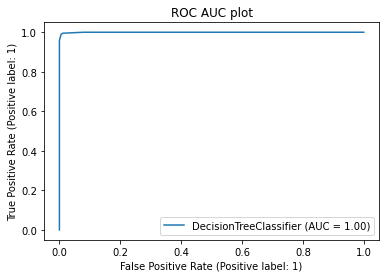

In [262]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()